In [4]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import PIL
import torch, torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import defectDataset

In [8]:
window_size = 50
pad_size = window_size

In [9]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(200, scale=(1, 1), ratio=(1, 1)),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation((-90,90)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.0040],
                             std=[0.9908])
    ])

In [10]:
defect_dataset = defectDataset(window_size = window_size, transforms=data_transform)
dataset_loader = torch.utils.data.DataLoader(defect_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [11]:
def imshow(img):
    img = img * 0.9908 + 0.0040     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

GroundTruth:  pos_o   pos pos_o pos_o
tensor([2, 0, 2, 2])


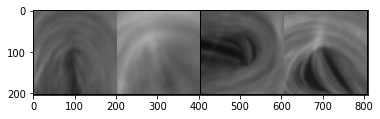

In [13]:
dataiter = iter(dataset_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
classes = ["pos","neg","pos_o","nuc","non"]
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
print(labels)

In [14]:
img_path = '/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/JPEGImages/'
csv_path = '/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/train.csv'
df_defect = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/labels.csv', sep=" ")
df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/train.csv', sep=" ")
df_test = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" ")

In [ ]:
trainset = defectDataset(csv_path='/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/train.csv',
                                             window_size = window_size, transforms=data_transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=4)
print("trainloader ready!")

testset = defectDataset(csv_path='/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv',
                                             window_size = window_size, transforms=data_transform)

testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size, shuffle=False,
                                             num_workers=4)
print("testloader ready!")

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("GPU in use")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

classes = ["pos","neg","pos_o","nuc","non"]
num_of_classes = len(classes)

